In [2]:
import numpy as np
import random
from genetic_algorithm import Genetic_Algorithm as ga

In [3]:
# Set general parameters
chromosome_length = 100
population_size = 20
maximum_generation = 200
best_score_progress = [] # Tracks progress

In [4]:
# Create starting population
population = ga.create_starting_population(population_size, chromosome_length)

In [5]:
population.shape

(20, 100)

In [28]:
# Display best score in starting population
scores = ga.calculate_fitness(population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

Starting best score, % target:  91.0


In [29]:
# Add starting best score to progress tracker
best_score_progress.append(best_score)

In [31]:
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = ga.select_individual_by_tournament(population, scores)
        parent_2 = ga.select_individual_by_tournament(population, scores)
        child_1, child_2 = ga.breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.002
    population = ga.randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = ga.calculate_fitness(population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

End best score, percent target: 100.0


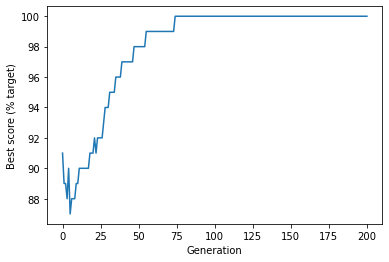

In [32]:
# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()